<a href="https://www.kaggle.com/code/animeshsinghiitm/mobile-price-classification?scriptVersionId=115485119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


**All Necessary Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Let's Load **train** and **test** data

In [3]:
traindata=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
testdata=pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

**Let's see the shape of data**

In [4]:
print('No of rows in train data: {row}'.format(row=traindata.shape[0]))
print('No of columns in train data: {columns}'.format(columns=traindata.shape[1]))
print('No of rows in test data: {row}'.format(row=testdata.shape[0]))
print('No of columns in test data: {columns}'.format(columns=testdata.shape[1]))

No of rows in train data: 2000
No of columns in train data: 21
No of rows in test data: 1000
No of columns in test data: 21


Now, Let's see first 5 rows of train data and test data

In [5]:
traindata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
testdata.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


let's seperate target (price_range) column from rest of the dataset.

In [7]:
target=traindata.iloc[:,-1]
traindata=traindata.iloc[:,:-1]

In [8]:
target.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [9]:
traindata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


Let's check for any missing value

In [10]:
traindata.isnull().sum() 
# there are no missing value as we can see for all feature it's 0

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Let's see summary statistics of this data

In [11]:
traindata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


**Since we can observe a lot variabilty in mean and standard deviation of features, we need to standardise this dataset.**
## Let's First Visualise this using different polts.

**Let's visualize our data**  
> Features variabilty can be better visualise in combined histogram

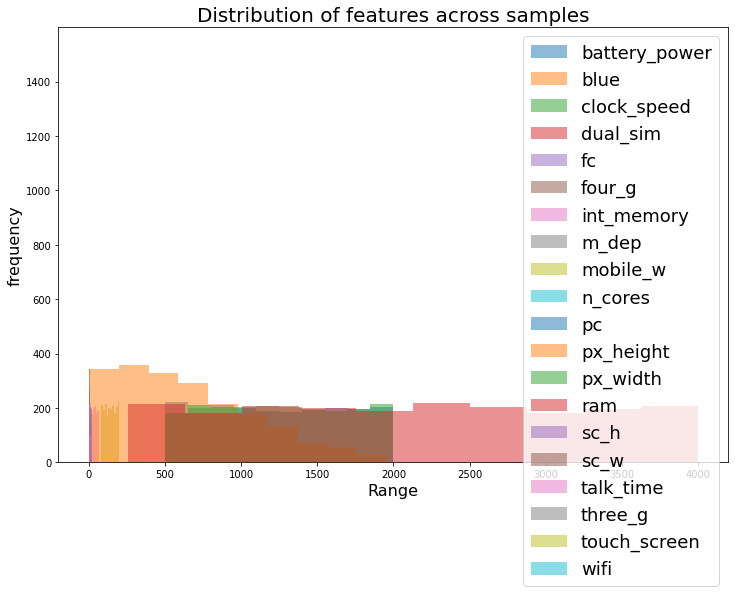

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
for colname in traindata:
    plt.hist(traindata[colname].values,alpha=0.5)
in_col=["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_w","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi"]
plt.legend(in_col,frameon=True,loc="upper right",fontsize=18)
plt.title("Distribution of features across samples",fontsize=20)
plt.xlabel("Range",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()

**Alternatively, we can also plot kde plot using gaussian kernels, kde stands for kernel density estimate** ,

*In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.* 

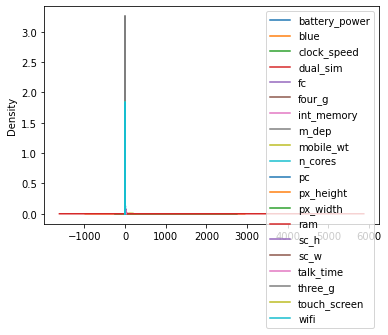

In [13]:
ax=traindata.plot.kde()

**Boxplot**

<AxesSubplot:>

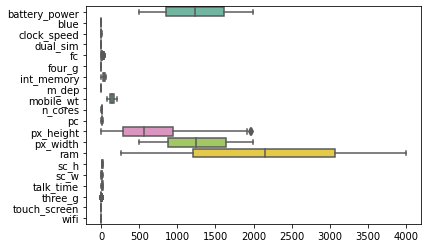

In [14]:
import seaborn as sns
sns.boxplot(data=traindata,orient="h",palette="Set2")

**Violen Plot**

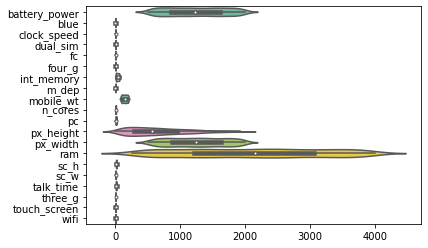

In [15]:
ax = sns.violinplot(data=traindata, orient="h", palette="Set2",  scale="width")

> After observing all these plots we can conclude that feature are at different scales, and using SVM, KNN,K-means algorithms that compute euclidean distance with this kind of data will impact there performance. But for tree based algorithms feature scaling is not required.
> 
> for feature scalling we will use StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
traindata_tf=ss.fit_transform(traindata)
traindata_tf=pd.DataFrame(traindata_tf,columns=traindata.columns)
traindata_tf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [17]:
traindata_tf.mean()

battery_power    2.149392e-16
blue            -1.243450e-17
clock_speed     -1.545430e-16
dual_sim         8.082424e-17
fc               5.861978e-17
four_g           1.048051e-16
int_memory      -9.592327e-17
m_dep           -1.030287e-16
mobile_wt        1.278977e-16
n_cores         -7.727152e-17
pc               1.403322e-16
px_height        1.181277e-16
px_width         6.084022e-17
ram             -1.811884e-16
sc_h             4.884981e-17
sc_w            -5.506706e-17
talk_time        1.421085e-16
three_g          1.421085e-17
touch_screen    -5.417888e-17
wifi             1.421085e-17
dtype: float64

In [18]:
traindata_tf.std()

battery_power    1.00025
blue             1.00025
clock_speed      1.00025
dual_sim         1.00025
fc               1.00025
four_g           1.00025
int_memory       1.00025
m_dep            1.00025
mobile_wt        1.00025
n_cores          1.00025
pc               1.00025
px_height        1.00025
px_width         1.00025
ram              1.00025
sc_h             1.00025
sc_w             1.00025
talk_time        1.00025
three_g          1.00025
touch_screen     1.00025
wifi             1.00025
dtype: float64

In [19]:
traindata_tf.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


Now we can observe that all our features are at comparable scale

*let's plot the plots again on this transformed data*

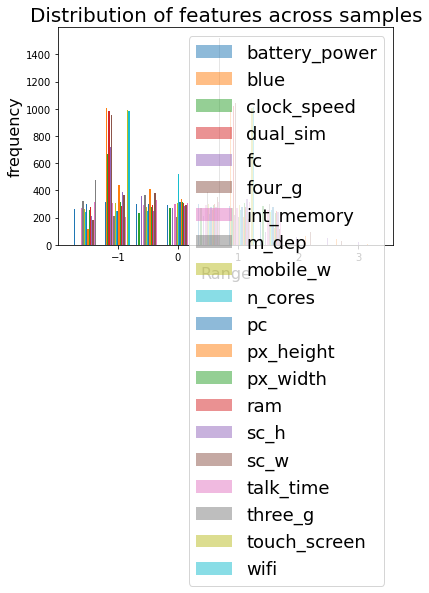

In [20]:
for colname in traindata_tf:
    plt.hist(traindata_tf,alpha=0.5)
plt.legend(in_col,frameon=True,loc="upper right",fontsize=18)
plt.title("Distribution of features across samples",fontsize=20)
plt.xlabel("Range",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()

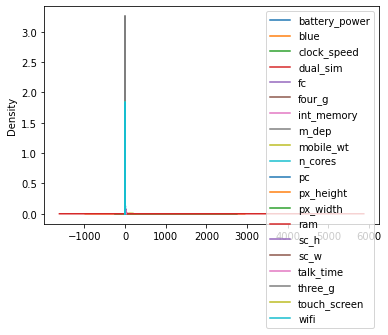

In [21]:
ax=traindata.plot.kde()

<AxesSubplot:>

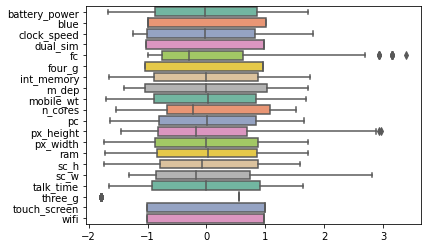

In [22]:
sns.boxplot(data=traindata_tf,orient="h",palette="Set2")

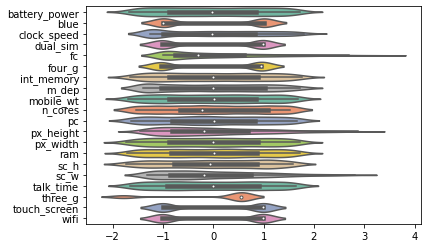

In [23]:
ax = sns.violinplot(data=traindata_tf, orient="h", palette="Set2",  scale="width")

## Now let's add dummy feature for the bias term
for this task we will use **add_dummy_feature** from **sklearn.preprocessing**

In [24]:
from sklearn.preprocessing import add_dummy_feature

In [25]:
traindata_tf=add_dummy_feature(traindata_tf)
traindata_tf=pd.DataFrame(traindata_tf,columns=["Dummy"]+in_col)
traindata_tf.head()

,Dummy,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_w,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1.0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,...,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,1.0,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,...,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,1.0,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,...,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,1.0,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,...,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.0,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,...,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


let's apply gridsearchCV for hyperparameter tuning 

*First we will try simple Logistic regression with gridsearchCV and will see how much score we can obtain using it.*

In [26]:
from sklearn.model_selection import GridSearchCV #Importing gridsearchcv

Let's first start with default values and no tuning and see the scores

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(traindata_tf,target,test_size=.25)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1500, 21), (500, 21), (1500,), (500,))

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(fit_intercept=True,warm_start=True,random_state=42)
m1=lr.fit(xtrain,ytrain)
ypred=m1.predict(xtest)

In [29]:
ypred=pd.DataFrame(ypred)
ytest=pd.DataFrame(ytest)
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,roc_auc_score
print('mean squared error: {mse}'.format(mse=mean_squared_error(ypred,ytest)))
print('root mean squared error: {rmse}'.format(rmse=mean_squared_error(ypred,ytest,squared=False)))
print('accuracy score showing fraction of correctly classified samples: {acno}'.format(acno=accuracy_score(ytest,ypred)))
print('accuracy score showing Number of correctly classified samples: {acno}'.format(acno=accuracy_score(ytest,ypred,normalize=False)))
print('F1 score : {f1}'.format(f1=f1_score(ytest,ypred,average=None)))

mean squared error: 0.036
root mean squared error: 0.18973665961010275
accuracy score showing fraction of correctly classified samples: 0.964
accuracy score showing Number of correctly classified samples: 482
F1 score : [0.97925311 0.94852941 0.94779116 0.98319328]


In [30]:
target.value_counts() #our data is balanced properly

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

**Let's do Hyperparameter Tuning using GridSearchCV**

In [31]:
#first build the hyperparameter space to search upon, so let's have a param_grid
param={
    'penalty':["l1", "l2", "elasticnet"],
    'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    "max_iter":[150,200,250]
}
gs=GridSearchCV(lr,param_grid=param,scoring='accuracy',cv=5,verbose=3,return_train_score=True)
gs.fit(traindata_tf,target)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_iter=150, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_iter=150, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_iter=150, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END max_iter=150, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END max_iter=150, penalty=l1, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END max_iter=150, penalty=l1, solver=liblinear;, score=(train=0.884, test=0.845) total time=   0.2s
[CV 2/5] END max_iter=150, penalty=l1, solver=liblinear;, score=(train=0.876, test=0.853) total time=   0.2s
[CV 3/5] END max_iter=150, penalty=l1, solver=liblinear;, score=(train=0.874, test=0.887) total time=   0.2s
[CV 4/5] END max_iter=150, penalty=l1, solver=liblinear;, score=(train=0.879, test=0.885) total time=   0.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END max_iter=150, penalty=l1, solver=saga;, score=(train=0.984, test=0.970) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END max_iter=150, penalty=l1, solver=saga;, score=(train=0.985, test=0.965) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END max_iter=150, penalty=l1, solver=saga;, score=(train=0.984, test=0.975) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END max_iter=150, penalty=l1, solver=saga;, score=(train=0.983, test=0.978) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END max_iter=150, penalty=l1, solver=saga;, score=(train=0.984, test=0.973) total time=   0.3s
[CV 1/5] END max_iter=150, penalty=l2, solver=lbfgs;, score=(train=0.976, test=0.960) total time=   0.1s
[CV 2/5] END max_iter=150, penalty=l2, solver=lbfgs;, score=(train=0.979, test=0.955) total time=   0.1s
[CV 3/5] END max_iter=150, penalty=l2, solver=lbfgs;, score=(train=0.981, test=0.968) total time=   0.1s
[CV 4/5] END max_iter=150, penalty=l2, solver=lbfgs;, score=(train=0.975, test=0.963) total time=   0.1s
[CV 5/5] END max_iter=150, penalty=l2, solver=lbfgs;, score=(train=0.976, test=0.968) total time=   0.1s
[CV 1/5] END max_iter=150, penalty=l2, solver=liblinear;, score=(train=0.863, test=0.833) total time=   0.0s
[CV 2/5] END max_iter=150, penalty=l2, solver=liblinear;, score=(train=0.854, test=0.840) total time=   0.0s
[CV 3/5] END max_iter=150, penalty=l2, solver=liblinear;, score=(train=0.846, test=0.863) total time=   0.0s
[CV 4/5] END max_iter=150, penalty=l2, solve

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END max_iter=150, penalty=l2, solver=saga;, score=(train=0.976, test=0.960) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END max_iter=150, penalty=l2, solver=saga;, score=(train=0.979, test=0.955) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END max_iter=150, penalty=l2, solver=saga;, score=(train=0.981, test=0.968) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END max_iter=150, penalty=l2, solver=saga;, score=(train=0.975, test=0.963) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END max_iter=150, penalty=l2, solver=saga;, score=(train=0.976, test=0.968) total time=   0.2s
[CV 1/5] END max_iter=150, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_iter=150, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_iter=150, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END max_iter=150, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END max_iter=150, penalty=elasticnet, solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END max_iter=150, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_iter=150, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_iter=150, penalty=elasticnet, solver=liblinear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END max_iter=200, penalty=l1, solver=saga;, score=(train=0.984, test=0.970) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END max_iter=200, penalty=l1, solver=saga;, score=(train=0.986, test=0.968) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END max_iter=200, penalty=l1, solver=saga;, score=(train=0.983, test=0.973) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END max_iter=200, penalty=l1, solver=saga;, score=(train=0.985, test=0.978) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END max_iter=200, penalty=l1, solver=saga;, score=(train=0.985, test=0.973) total time=   0.4s
[CV 1/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.976, test=0.960) total time=   0.1s
[CV 2/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.979, test=0.955) total time=   0.1s
[CV 3/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.981, test=0.968) total time=   0.1s
[CV 4/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.975, test=0.963) total time=   0.1s
[CV 5/5] END max_iter=200, penalty=l2, solver=lbfgs;, score=(train=0.976, test=0.968) total time=   0.1s
[CV 1/5] END max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.863, test=0.833) total time=   0.0s
[CV 2/5] END max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.854, test=0.840) total time=   0.0s
[CV 3/5] END max_iter=200, penalty=l2, solver=liblinear;, score=(train=0.846, test=0.863) total time=   0.0s
[CV 4/5] END max_iter=200, penalty=l2, solve

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END max_iter=250, penalty=l1, solver=saga;, score=(train=0.984, test=0.970) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END max_iter=250, penalty=l1, solver=saga;, score=(train=0.986, test=0.968) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END max_iter=250, penalty=l1, solver=saga;, score=(train=0.984, test=0.973) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END max_iter=250, penalty=l1, solver=saga;, score=(train=0.984, test=0.978) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END max_iter=250, penalty=l1, solver=saga;, score=(train=0.985, test=0.973) total time=   0.4s
[CV 1/5] END max_iter=250, penalty=l2, solver=lbfgs;, score=(train=0.976, test=0.960) total time=   0.1s
[CV 2/5] END max_iter=250, penalty=l2, solver=lbfgs;, score=(train=0.979, test=0.955) total time=   0.1s
[CV 3/5] END max_iter=250, penalty=l2, solver=lbfgs;, score=(train=0.981, test=0.968) total time=   0.1s
[CV 4/5] END max_iter=250, penalty=l2, solver=lbfgs;, score=(train=0.975, test=0.963) total time=   0.1s
[CV 5/5] END max_iter=250, penalty=l2, solver=lbfgs;, score=(train=0.976, test=0.968) total time=   0.1s
[CV 1/5] END max_iter=250, penalty=l2, solver=liblinear;, score=(train=0.863, test=0.833) total time=   0.0s
[CV 2/5] END max_iter=250, penalty=l2, solver=liblinear;, score=(train=0.854, test=0.840) total time=   0.0s
[CV 3/5] END max_iter=250, penalty=l2, solver=liblinear;, score=(train=0.846, test=0.863) total time=   0.0s
[CV 4/5] END max_iter=250, penalty=l2, solve

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
165 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, warm_start=True),
             param_grid={'max_iter': [150, 200, 250],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True, scoring='accuracy', verbose=3)

**So the best estimator found is:**

In [32]:
gs.best_estimator_ 

LogisticRegression(max_iter=150, penalty='l1', random_state=42, solver='saga',
                   warm_start=True)

In [33]:
gs.best_score_

0.9720000000000001